In [27]:
import pandas as pd
import shutil
import os
import zipfile
import gzip
import datetime as dt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
path = 'Data/Weather/'
fn = '2016.csv.gz'

print('Unzipping...')
try:
    os.mkdir(path + 'output/', )
except OSError:
    pass
with gzip.open(path + fn, 'rb') as f_in, open(path + 'output/' + fn.replace('.gz',''), 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
print('Reading CSV')
df = pd.read_csv(path + 'output/' + fn.replace('.gz', ''), header=None)
# shutil.rmtree(path + 'output', )
base_row_count = len(df)

Unzipping...
Reading CSV


In [29]:
base_row_count

35212758

In [30]:
df.drop([4,5,6,7], axis=1, inplace=True)

In [31]:
df.columns = ['station_id', 'date', 'obsv_type', 'obsv_value']

In [32]:
df.head(5)

,station_id,date,obsv_type,obsv_value
0,US1MNWR0029,20160101,PRCP,0
1,CA1AB000023,20160101,PRCP,0
2,CA1AB000023,20160101,SNOW,0
3,CA1AB000023,20160101,SNWD,102
4,ASN00015643,20160101,TMAX,308


In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [8]:
# JFK International Airport
mask = (
            (df['station_id'] == 'USW00094789') &
            (df['obsv_type'].isin(['TMAX', 'TMIN', 'TAVG']))
        )
df_mask = df[mask]

In [9]:
def get_colors(df):
    colors = ['b', 'r', 'y', 'g', 'm', 'c', 'k']
    mapping = {}
    i = 0
    for val in pd.unique(df['obsv_type']):
        mapping[val] = colors[i]
        i += 1
    return mapping

In [10]:
color_mapping = get_colors(df_mask)
df_mask['color'] = df_mask['obsv_type'].apply(lambda x: color_mapping[x])
df_mask['obsv_value'] = df_mask['obsv_value'].apply(lambda x: (x/10*9/5) + 32)
df_mask.head()

/home/chrisgiler/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/chrisgiler/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,station_id,date,obsv_type,obsv_value,color
35040,USW00094789,2016-01-01,TMAX,44.06,b
35041,USW00094789,2016-01-01,TMIN,35.96,r
35046,USW00094789,2016-01-01,TAVG,42.44,y
131740,USW00094789,2016-01-02,TMAX,41.00,b
131741,USW00094789,2016-01-02,TMIN,33.98,r


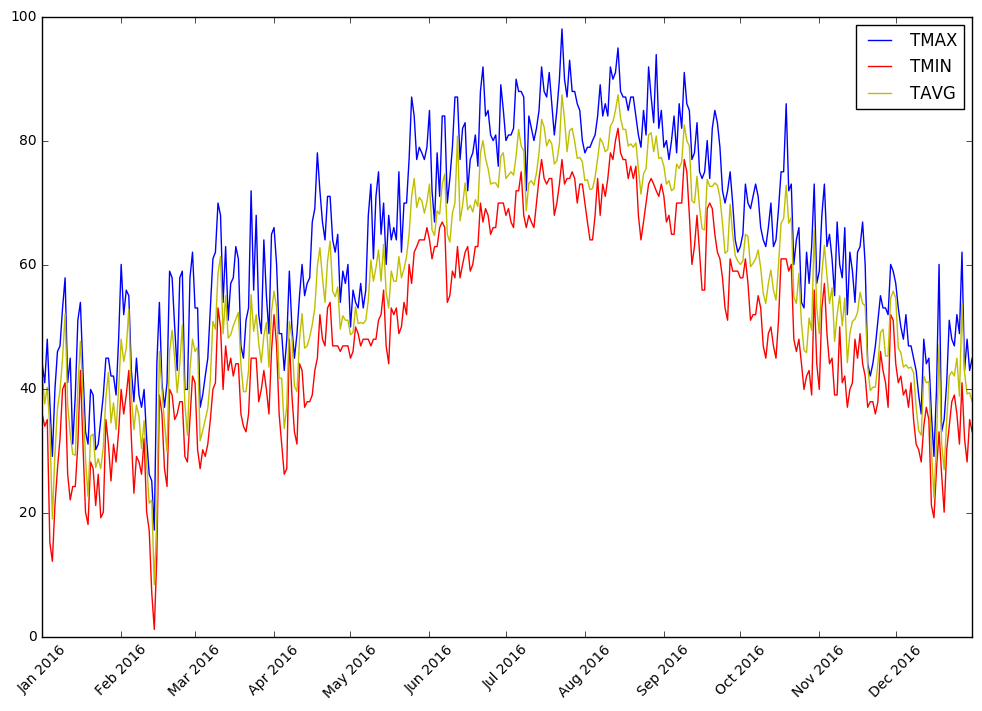

In [11]:
plt.figure(figsize=(12,8))
for obsv_type in pd.unique(df_mask['obsv_type']):
    cur_mask = df_mask['obsv_type'] == obsv_type
    plt.plot_date(df_mask[cur_mask]['date'],
                  df_mask[cur_mask]['obsv_value'],
                  c = df_mask[cur_mask]['color'].iloc[0],
                  ls = 'solid', marker='None', lw=1,
                  label = df_mask[cur_mask]['obsv_type'].iloc[0])
plt.xticks(rotation=45);
plt.legend();

In [26]:
df[((df['station_id'] == 'USW00093721') & (df['date'] == dt.datetime(2016,1,1)))]

,station_id,date,obsv_type,obsv_value
868,USW00093721,2016-01-01,TMAX,72
869,USW00093721,2016-01-01,TMIN,-21
870,USW00093721,2016-01-01,PRCP,0
871,USW00093721,2016-01-01,SNOW,0
872,USW00093721,2016-01-01,SNWD,0
873,USW00093721,2016-01-01,AWND,37
874,USW00093721,2016-01-01,TAVG,52
875,USW00093721,2016-01-01,WDF2,290
876,USW00093721,2016-01-01,WDF5,290
877,USW00093721,2016-01-01,WSF2,94


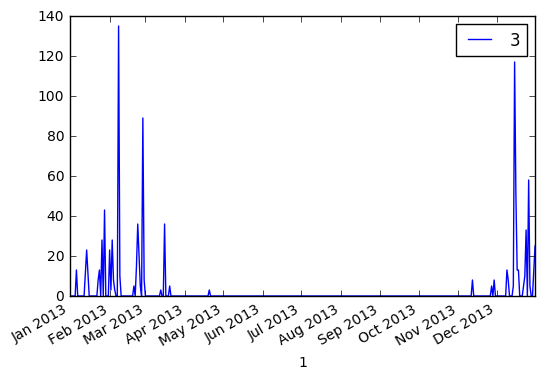

In [10]:
df[((df[0]=='US1MISW0005') & (df[2] == 'SNOW'))].plot(1, 3)

In [9]:
len(pd.unique(df[0]))

41475

In [25]:
for x in pd.unique(df['obsv_type']):
    print(x)

PRCP
SNOW
SNWD
TMAX
TMIN
TAVG
WESD
WESF
WDFG
WSFG
AWND
WDF2
WDF5
WSF2
WSF5
PGTM
WT01
TOBS
WT11
SN52
SX52
SN32
SX32
EVAP
MNPN
MXPN
AWDR
WSFI
WDMV
WT08
SN53
SN55
SX53
SX55
WT03
SN31
SN33
SX31
SX33
DATX
MDTX
DAPR
MDPR
TSUN
DATN
MDTN
WT04
WT02
THIC
WT06
SN51
SX51
SN35
SX35
SN36
SX36
SN56
SX56
DWPR
WT09
PSUN
WT05
WT07
DASF
MDSF
WT10
WT17
WT18
